# Grouping and aggregating data

Most of the time, in pandas, we use `.groupby()` to group and aggregate data. This is a function that splits your data into certain categories, and then performs an aggregation, transformation, or filtration to those categories. Today we will only be looking at `.groupby()` and aggregations, and how they can help us to analyse our data. We will also learn about `resample()` as an alternative, more concise way to group dates and times.

As always, let's start by reading the data:

In [1]:
import pandas as pd

In [2]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands_cl.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [5]:
ol_df = orderlines_cl.copy()

In [ ]:
ol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216250 entries, 0 to 216249
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                216250 non-null  int64  
 1   id_order          216250 non-null  int64  
 2   product_id        216250 non-null  int64  
 3   product_quantity  216250 non-null  int64  
 4   sku               216250 non-null  object 
 5   unit_price        216250 non-null  float64
 6   date              216250 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 11.5+ MB


Change `date` to datetime.

In [19]:
ol_df["date"] = pd.to_datetime(ol_df["date"])

## 1.&nbsp; `.groupby` a single feature

When we use the `.groupby()` method, we always state in the parentheses the name of the column that contains the categories that should be grouped. For example, we are grouping here by the product number (SKU), which will give us one line per sku. `.count()` will tell us how many rows have been condensed into each group.

In [ ]:
ol_df.groupby("sku").count()

,id,id_order,product_id,product_quantity,unit_price,date
sku,,,,,,
8MO0001-A,2,2,2,2,2,2
8MO0003-A,3,3,3,3,3,3
8MO0007,29,29,29,29,29,29
8MO0008,30,30,30,30,30,30
8MO0009,28,28,28,28,28,28
...,...,...,...,...,...,...
ZAG0041,2,2,2,2,2,2
ZAG0042,1,1,1,1,1,1
ZEP0007,5,5,5,5,5,5


Notice how in this "grouped" DataFrame we have 6798 rows: one row for each unique `sku`. In the original DataFrame we had many more rows:

In [ ]:
ol_df.sku.nunique()

6798

In [ ]:
ol_df.shape

(216250, 7)

As you can see above, the same number of rows were condensed for each column, this is to be expected when we use `count()` as the aggregation function. However, if we use an aggregate such as `.sum()`, then we get the total for the condensed values of each column:

In [ ]:
# here we use numeric=true as ol_df contains a datetime column, which is excluded by using this parameter
# by default numeric_only = False

ol_df.groupby("sku").sum(numeric_only=True)

,id,id_order,product_id,product_quantity,unit_price
sku,,,,,
8MO0001-A,2731953,813237,0,2,25.92
8MO0003-A,4893267,1557627,0,3,38.55
8MO0007,37205508,10794389,0,30,619.71
8MO0008,38188229,11034203,0,31,651.70
8MO0009,40281947,12270595,0,30,499.60
...,...,...,...,...,...
ZAG0041,3289730,1050270,0,2,39.98
ZAG0042,1641159,523690,0,1,19.99
ZEP0007,6423489,1858331,0,5,685.59


Now, obviously, not all of the information above matters: it's not relevant what the sum of the `id`'s is. So, let's select the `product_quantity` and see how many units of each product were sold:

In [ ]:
ol_df.groupby("sku")["product_quantity"].sum()

,product_quantity
sku,
8MO0001-A,2
8MO0003-A,3
8MO0007,30
8MO0008,31
8MO0009,30
...,...
ZAG0041,2
ZAG0042,1
ZEP0007,5


It can be useful sometimes to sort the values from highest to lowest. With the `.sum()` of `product_quantity` this will help us to see how many of each item we sold in order of quantity.

In [ ]:
(
    ol_df
    .groupby("sku")["product_quantity"]
    .sum()
    .sort_values(ascending=False)
)

,product_quantity
sku,
APP1190,5576
APP0698,2337
WDT0183,1828
APP1922,1663
APP0927,1618
...,...
PAC2241,1
JBL0156,1
PAC2237,1


Or if you wish for only a certain number of the largest or smallest numbers, remember you can use `.nlargest()` or `.nsmallest()`

In [ ]:
(
    ol_df
    .groupby("sku")["product_quantity"]
    .sum()
    .nlargest(10)
)

,product_quantity
sku,
APP1190,5576
APP0698,2337
WDT0183,1828
APP1922,1663
APP0927,1618
SAM0074,1346
APP1970,1182
APP1221,1131
CRU0051,1122


### 1.1.&nbsp; List of aggregates

It is possible to use many different aggregates besides just `.sum()` and `.count()`. A full list can be found [here](https://pandas.pydata.org/docs/reference/groupby.html), and below are a few of the most useful.

* `.count()` – Number of non-null observations
* `.sum()` – Sum of values
* `.mean()` – Mean of values
* `.median()` – Median of values
* `.min()` – Minimum
* `.max()` – Maximum
* `.std()` – Standard deviation

### 1.2.&nbsp; `.agg()`
We are not restricted to only using one aggregate at a time. We can use the `.agg()` method to see multiple aggregates at once.

#### 1.2.1.&nbsp; multiple aggregates for one column
Here we first `.groupby()` the `sku`'s, then take the column `product quantity`, and look at both the `.sum()` and `.count()` of `product_quantity`. We also here reduced our DataFrame to the 10 largest `sku`"s according to the `.sum()` of `product_quantity`.

> **Tip:** when working with many Pandas methods chained one after the other, wrap all the statement in parenthesis and add a line break before any `.method()`. It will improve the readability of the code*

In [ ]:
(
    ol_df
    .groupby("sku")["product_quantity"]
    .agg(["sum", "count"])
    .nlargest(10, "sum")
)

,sum,count
sku,,
APP1190,5576,4306
APP0698,2337,1615
WDT0183,1828,1124
APP1922,1663,1560
APP0927,1618,1369
SAM0074,1346,1259
APP1970,1182,1007
APP1221,1131,1108
CRU0051,1122,948


In [ ]:
(
    ol_df
    .groupby("sku")
    .agg(product_sum =("product_quantity","sum"),product_count =("product_quantity","count"))
    .nlargest(10, "product_sum")
)

,product_sum,product_count
sku,,
APP1190,5576,4306
APP0698,2337,1615
WDT0183,1828,1124
APP1922,1663,1560
APP0927,1618,1369
SAM0074,1346,1259
APP1970,1182,1007
APP1221,1131,1108
CRU0051,1122,948


#### 1.2.2.&nbsp; mutliple aggregates for more than one column
Not only can we look at multiple aggregates for one column. We can also look at multiple aggregates over multiple columns. Here we again `.groupby()` `sku` and take the `.sum()` and `.count()` of `product_quantity`, **and also** look at the `.mean()` of the `unit_price`.

In [ ]:
(
    ol_df
    .groupby("sku")
    .agg({"product_quantity": ["sum", "count"], "unit_price": "mean"})
    .nlargest(10, ("product_quantity", "count"))
)

product_quantity        unit_price
                     sum count        mean
sku                                       
APP1190             5576  4306   56.014057
APP0698             2337  1615   10.116279
APP1922             1663  1560  162.143968
APP0927             1618  1369   17.038773
SAM0074             1346  1259  152.823606
WDT0183             1828  1124  139.061770
APP1221             1131  1108  106.131146
APP1970             1182  1007  362.970417
CRU0051             1122   948  140.734863
APP1214              946   904   80.534812

## 2.&nbsp; `.groupby()` multiple features
It's also possible to `.groupby()` multiple categories. Let's see how many products we sold each month.

In [ ]:
(
    ol_df
    .groupby([ol_df["date"].dt.year,
              ol_df["date"].dt.month])["product_quantity"]
    .sum()
 )

date  date
2017  1       22363
      2       14616
      3       12443
      4       13781
      5       11665
      6       11221
      7       15347
      8       11530
      9       12213
      10      15387
      11      33082
      12      24455
2018  1       23810
      2       15831
      3        8067
Name: product_quantity, dtype: int64

Looks like the end of the year and the begining of the year are the busiest times.

### 1.4.&nbsp; `.groupby()` aggregate plotting
It's also possible to quickly plot aggregates with `.groupby()`, which can help us better understand the data. Let's plot the above values showing how many products we sold each month.

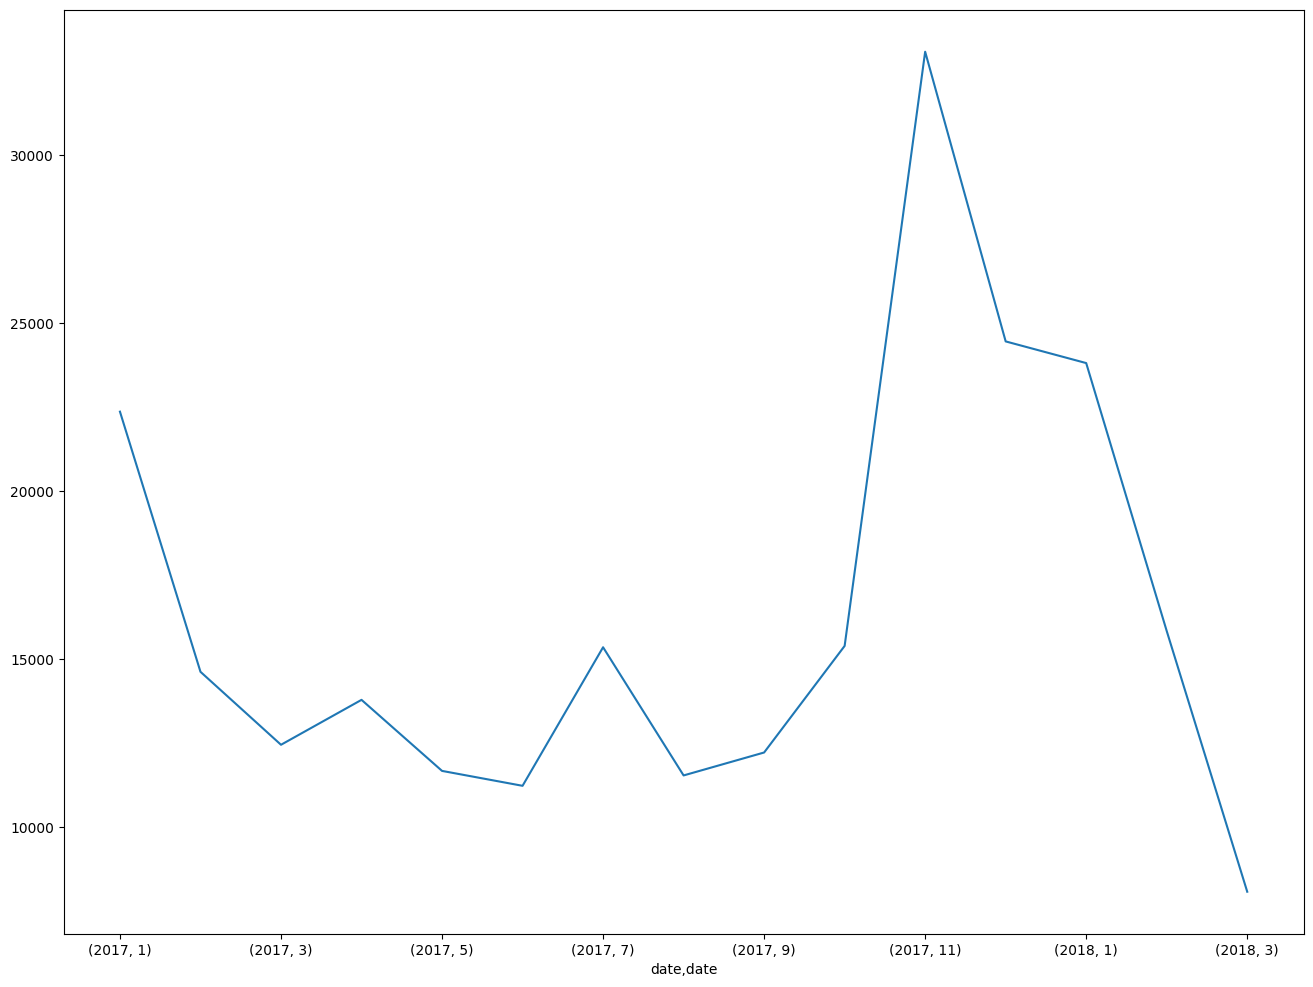

In [ ]:
(
    ol_df.groupby([ol_df["date"].dt.year,
                   ol_df["date"].dt.month])["product_quantity"]
    .sum()
    .plot(figsize=(16, 12))
);

## 3.&nbsp; `.resample()`

Resampling allows us to easily aggregate time series data. When using `.resample()`, we have to define:
- The frequency of time for which to group the data (e.g. 5 minutely, hourly, daily...) expressed as a "frequency string" (`"W"` for weekly, `"M"` for monthly...). Find all available frequency strings [here](https://business-science.github.io/pytimetk/guides/03_pandas_frequency.html).
- The column with the dates group by needs to be passed to the `on` parameter (unless you want group by the index).
- The aggregate function (`sum()`, `count()`, `mean()`...)
- The numerical column/s to aggregate.

With this we can easily recreate our groupby above, where we looked at the amount of products sold each month. The date displayed is the last day of the given month.

In [ ]:
(
    ol_df
    .resample("ME", on="date")["product_quantity"]
    .sum()
    .sort_values(ascending=False)
)

,product_quantity
date,
2017-11-30,33082
2017-12-31,24455
2018-01-31,23810
2017-01-31,22363
2018-02-28,15831
2017-10-31,15387
2017-07-31,15347
2017-02-28,14616
2017-04-30,13781


In [ ]:
(
    ol_df
    .groupby(ol_df["date"].dt.month)["product_quantity"]
    .sum()
 )

,product_quantity
date,
1,46173
2,30447
3,20510
4,13781
5,11665
6,11221
7,15347
8,11530
9,12213


In [ ]:
  (ol_df.groupby([ol_df["date"].dt.year,
                   ol_df["date"].dt.month])["product_quantity"]
    .sum()
  )

date  date
2017  1       22363
      2       14616
      3       12443
      4       13781
      5       11665
      6       11221
      7       15347
      8       11530
      9       12213
      10      15387
      11      33082
      12      24455
2018  1       23810
      2       15831
      3        8067
Name: product_quantity, dtype: int64

We can also quickly plot a daily graph for the amount of products sold.

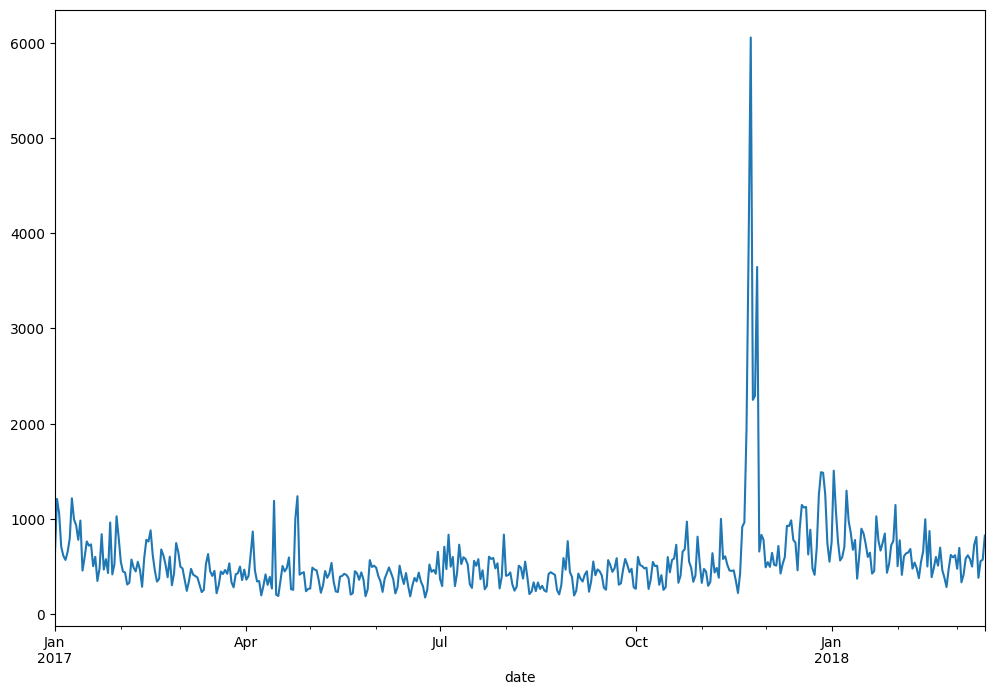

In [ ]:
(
    ol_df
    .resample("D", on="date")
    .sum()["product_quantity"]
    .plot(figsize=(12, 8))
 );

We can create the same graph as above using `.groupby()`, it just takes a little more code

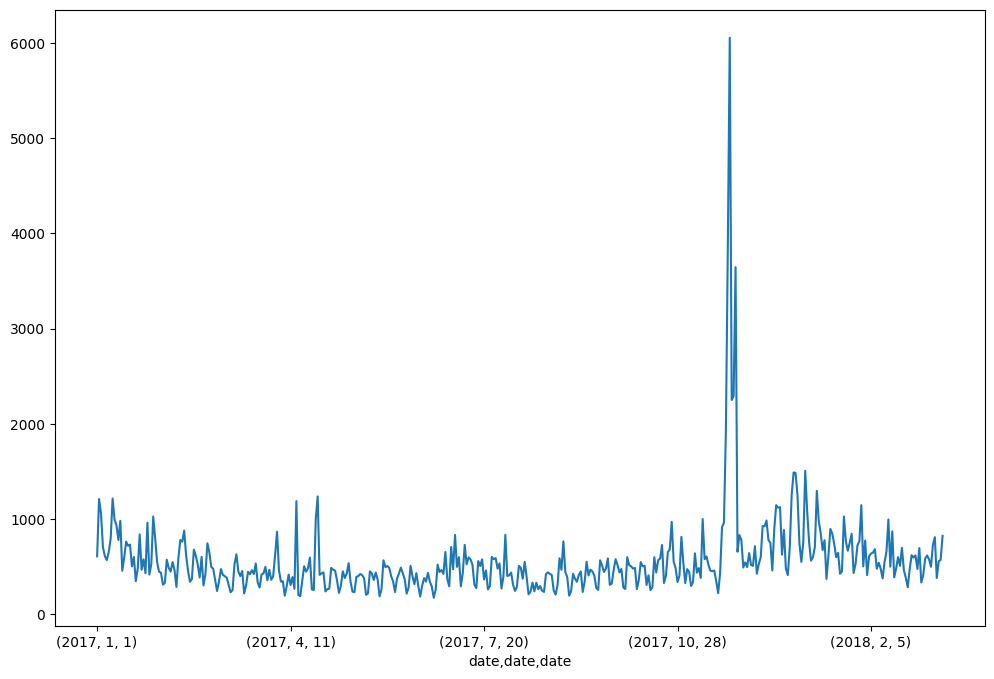

In [ ]:
(
    ol_df
    .groupby([ol_df.date.dt.year,
              ol_df.date.dt.month,
              ol_df.date.dt.day])["product_quantity"]
    .sum()
    .plot(figsize=(12, 8))
 );

As you can see from the x-axis of the two charts above, `.resample()` works a little more inuitvely when you want to group by datetimes. This isn't to say that you cannot use `.groupby()` with datetimes, of course you can. `.resample()` just provides us with a little extra flexibility to group datetime by specific groups. For example, you can create `.resample()` input strings such as `2H20min` for groups of 2 hours 20minutes, `3min` for groups of 3 minutes, `1D3H` for 1 day 3hours etc...

In [ ]:
(
    ol_df
    .resample("ME", on="date")["product_quantity", "unit_price"]
    .sum()
    #.sort_values(ascending=False, by = "product_quantity")
)

,product_quantity,unit_price
date,,
2017-01-31,22363,2191697.24
2017-02-28,14616,1711046.96
2017-03-31,12443,1457449.71
2017-04-30,13781,1421323.17
2017-05-31,11665,1500712.79
2017-06-30,11221,1617040.15
2017-07-31,15347,2301084.98
2017-08-31,11530,1654717.65
2017-09-30,12213,1941521.77


In [ ]:
(
    ol_df
    .groupby("sku")
    .resample("YE", on="date")["product_quantity", "unit_price"]
    .sum()
    #.sort_values(ascending=False, by = "product_quantity")
)

product_quantity  unit_price
sku       date                                    
8MO0001-A 2017-12-31                 2       25.92
8MO0003-A 2018-12-31                 3       38.55
8MO0007   2017-12-31                30      619.71
8MO0008   2017-12-31                31      651.70
8MO0009   2017-12-31                17      309.46
...                                ...         ...
ZEP0007   2017-12-31                 4      559.60
          2018-12-31                 1      125.99
ZEP0008   2017-12-31                 1      104.12
par0072   2017-12-31                 8     1820.94
          2018-12-31                 5      868.96

[9875 rows x 2 columns]

# Challenges

## Challenge 1. What are the top 8 most sold products?

In [6]:
# Helmut

(ol_df.groupby('sku')[['product_quantity']]
 .sum()
 .nlargest(8, 'product_quantity')
 .join(products_cl.set_index('sku')))

,product_quantity,name,desc,price,in_stock,type
sku,,,,,,
APP1190,5576,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,70.00,1,1231
APP0698,2337,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230
WDT0183,1828,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 4T...,169.00,1,12655397
APP1922,1663,AirPods Apple Bluetooth Headset for iPhone iPa...,Apple AirPods wireless headsets and cargo tran...,179.00,1,5384
APP0927,1618,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384
SAM0074,1346,Samsung 850 EVO SSD Disk 500GB,SSD hard drive Mac and PC 25 inch 500GB SATA I...,179.99,1,12215397
APP1970,1182,Apple iPhone 32GB Space Gray,New iPhone SE with 4-inch screen 32 free GB.,419.00,0,51601716
APP1221,1131,Apple Pencil,Pencil Apple iPad Pro.,109.00,1,1229


In [7]:
#Nora
ol_df.groupby("sku").agg({"product_quantity" :["sum"]}).nlargest(8, ("product_quantity", "sum"))

,product_quantity
,sum
sku,
APP1190,5576
APP0698,2337
WDT0183,1828
APP1922,1663
APP0927,1618
SAM0074,1346
APP1970,1182
APP1221,1131


In [9]:
#Nic
(
    ol_df
    .groupby("sku")["product_quantity"]
    .sum()
    .nlargest(8)
)

,product_quantity
sku,
APP1190,5576
APP0698,2337
WDT0183,1828
APP1922,1663
APP0927,1618
SAM0074,1346
APP1970,1182
APP1221,1131


## Challenge 2. How many products did each of the 5 largest orders contain?

In [11]:
#Nora
ol_df.groupby("id_order").agg({"product_quantity" :["sum"]}).nlargest(5, ("product_quantity", "sum"))

,product_quantity
,sum
id_order,
346221,999
349475,800
349133,555
335057,202
417536,200


In [12]:
#Uliana
ol_df.groupby('id_order').agg(quantity_sold_1=('product_quantity','sum'),sum_products=('sku','count')).nlargest(5,columns='quantity_sold_1')

,quantity_sold_1,sum_products
id_order,,
346221,999,1
349475,800,1
349133,555,1
335057,202,2
417536,200,1


In [14]:
ol_df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
216245,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
216246,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
216247,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
216248,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


In [13]:
#Helmut -- which are the orders with most different Items in it
(
    ol_df
    .groupby('id_order')
    .id.count()
    .nlargest(5)
)

,id
id_order,
428186,32
323269,17
406616,17
319417,15
332942,15


In [15]:
#Sample
ol_df.groupby("id_order").sum().nlargest(5, "product_quantity")

,id,product_id,product_quantity,sku,unit_price,date
id_order,,,,,,
346221,1228150,0,999,APP1190,55.99,2017-04-14 21:50:52
349475,1234924,0,800,KIN0137,7.49,2017-04-25 09:59:00
349133,1234111,0,555,APP0665,70.99,2017-04-24 10:20:13
335057,2409577,0,202,THU0029THU0031,161.98,2017-03-14 15:25:532017-03-14 15:28:16
417536,1388261,0,200,TRK0009,29.99,2017-10-25 15:02:39


## Challenge 3. We want to see how busy the days of the week are to know when we need more staff. Rank the days of the week from busiest to least busy.
Bonus points for using your pandas plotting skills.

<Axes: xlabel='date'>

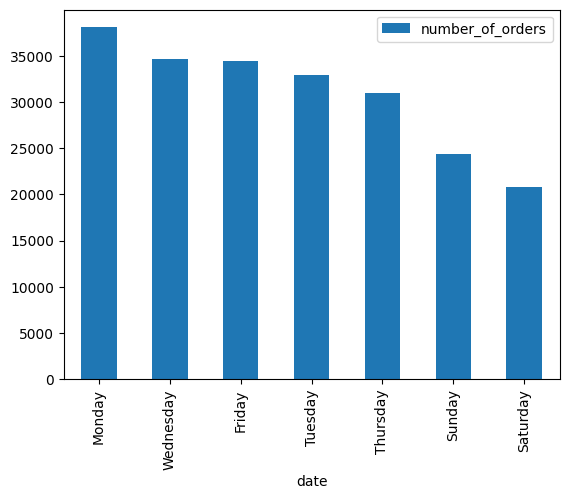

In [20]:
#Uliana
(ol_df.groupby([ol_df["date"].dt.day_name(),])
              .agg(number_of_orders=('id_order','count'))
              .sort_values('number_of_orders',ascending=False)
              .plot(kind='bar')
)

<Axes: xlabel='date'>

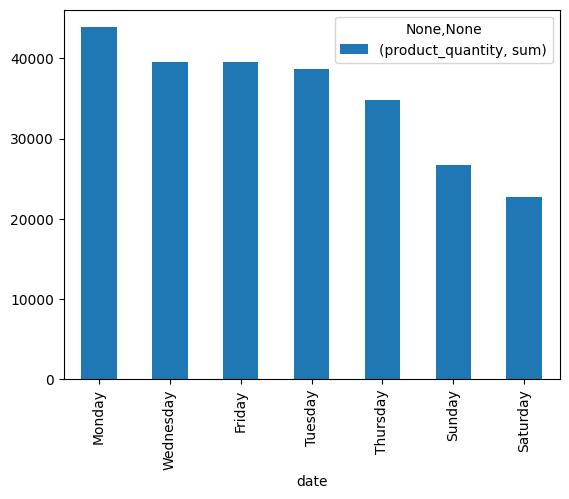

In [21]:
#Nora
(ol_df.groupby(ol_df["date"].dt.day_name())
.agg({"product_quantity" :["sum"]})
.sort_values(by=("product_quantity", "sum"), ascending=False)
.plot(kind = "bar"  )
)

Text(0, 0.5, 'Number of products sold')

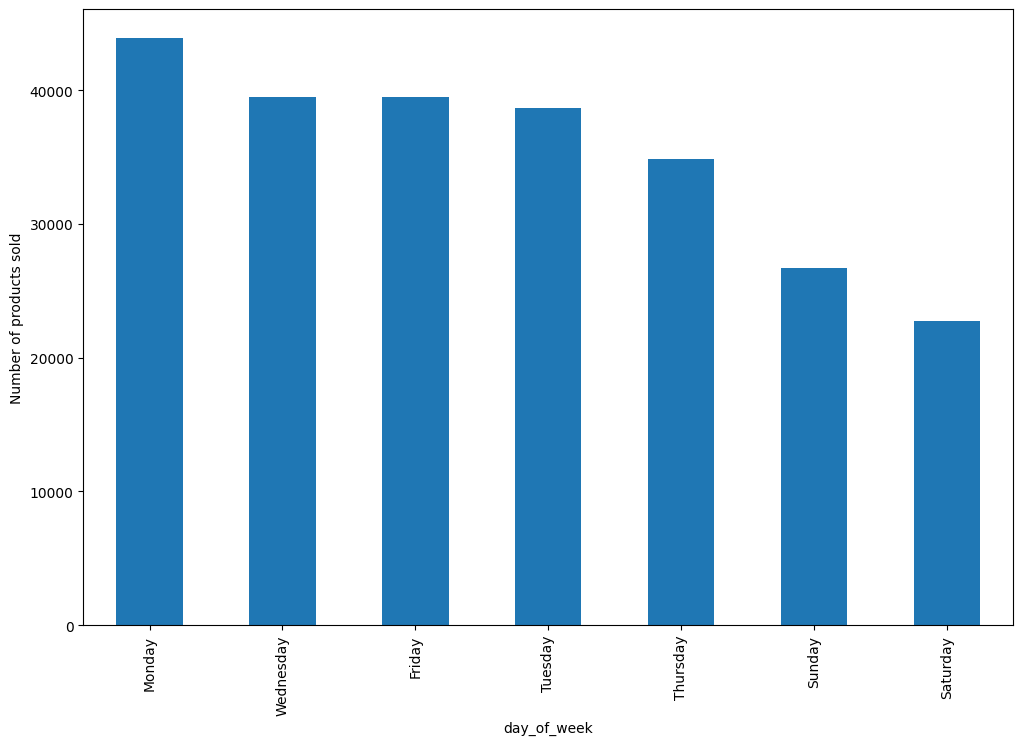

In [23]:
import matplotlib.pyplot as plt

#Nic
ol_df["day_of_week"] = ol_df["date"].dt.day_name()

(
    ol_df
    .groupby("day_of_week")["product_quantity"]
    .sum()
    .sort_values(ascending=False)
    .plot(kind='bar', figsize=(12, 8))
);

plt.ylabel("Number of products sold")

## Challenge 4. Which brands sell the most products?

In [24]:
ol_df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,day_of_week
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,Sunday
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,Sunday
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,Sunday
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,Sunday
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,Sunday


In [25]:
brands.head()

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio


In [26]:
ol_df['brand_name']=ol_df['sku'].str.slice(0,3)

In [27]:
ol_df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,day_of_week,brand_name
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,Sunday,OTT
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,Sunday,LGE
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,Sunday,PAR
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,Sunday,WDT
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,Sunday,JBL


In [28]:
#Uliana
ol_df['brand_name']=ol_df['sku'].str.slice(0,3)

merged_with_brands=ol_df.merge(brands,left_on='brand_name', right_on='short',how='left')

merged_with_brands.groupby('long').agg(nr_of_products_sold=('product_quantity','sum')).nlargest(10,'nr_of_products_sold')

,nr_of_products_sold
long,
Apple,58210
OWC,12069
Western Digital,9821
Pack,8004
Crucial,7955
Belkin,7659
Wacom,7065
LaCie,6787
SanDisk,5351


In [29]:
#Monika
ol_df["brand"]=ol_df["sku"].str[:3]

(
    ol_df
    .groupby("brand")["product_quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

,product_quantity
brand,
APP,55118
OWC,12069
WDT,9821
PAC,8004
CRU,7955


In [33]:
brands.loc[brands.long=="Apple",]

,short,long
6,AP2,Apple
7,APP,Apple


## Challenge 5. Plot a line chart for the amount of orders each hour of November 2017

In [34]:
#Uliana
orders_nov_2017=ol_df.loc[(ol_df['date'].dt.month==11)&(ol_df['date'].dt.year==2017)].copy()
orders_nov_2017

,id,id_order,product_id,product_quantity,sku,unit_price,date,day_of_week,brand_name,brand
121228,1394791,420581,0,1,APP2504,391.02,2017-11-01 00:19:03,Wednesday,APP,APP
121229,1394796,420583,0,1,OWC0194-4,374.99,2017-11-01 00:44:48,Wednesday,OWC,OWC
121230,1394801,420586,0,1,PAC2194,255.59,2017-11-01 00:57:03,Wednesday,PAC,PAC
121231,1394802,420586,0,1,APP1215,105.00,2017-11-01 00:57:03,Wednesday,APP,APP
121232,1394803,420586,0,1,APP1214,78.00,2017-11-01 00:57:03,Wednesday,APP,APP
...,...,...,...,...,...,...,...,...,...,...
151124,1470650,452966,0,1,BEL0275,14.99,2017-11-30 23:48:45,Thursday,BEL,BEL
151125,1470653,452967,0,1,WAC0225,444.99,2017-11-30 23:49:35,Thursday,WAC,WAC
151126,1470655,452966,0,1,ZAG0034,9.99,2017-11-30 23:52:18,Thursday,ZAG,ZAG
151127,1470656,452961,0,1,OTT0175,19.99,2017-11-30 23:53:26,Thursday,OTT,OTT


<ipython-input-35-ee564cdbf948>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  orders_nov_2017.resample("H", on="date")["id_order"].count().plot(figsize=(12, 8));


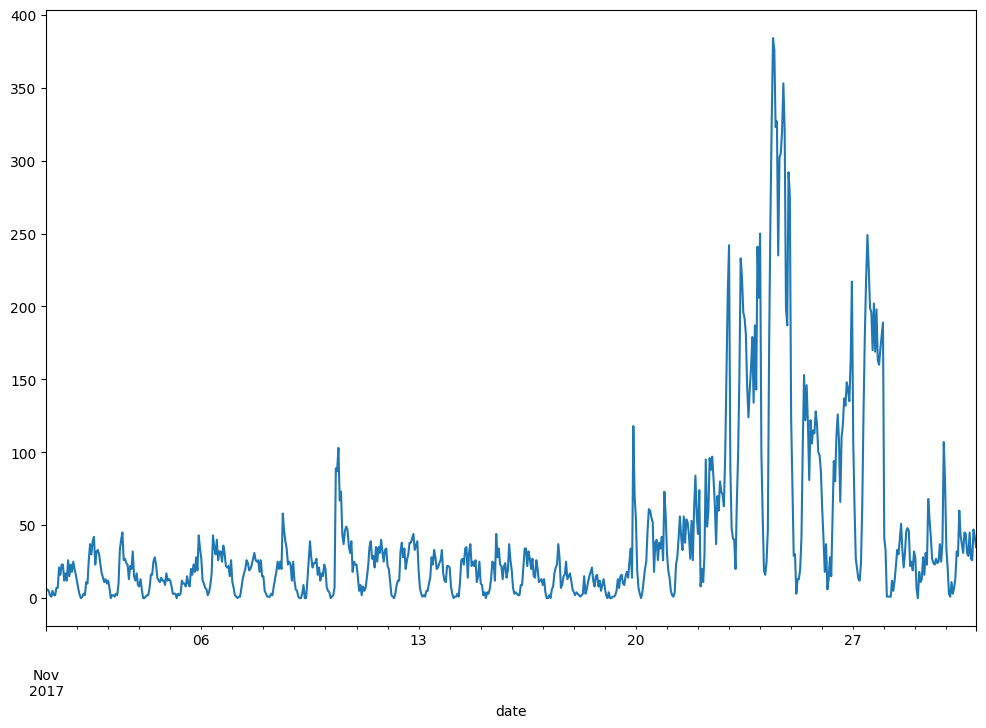

In [35]:
orders_nov_2017.resample("H", on="date")["id_order"].count().plot(figsize=(12, 8));

In [37]:
orders_nov_2017.resample("H", on="date")["id_order"].count()

<ipython-input-37-d68905e38ffa>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  orders_nov_2017.resample("H", on="date")["id_order"].count()


,id_order
date,
2017-11-01 00:00:00,5
2017-11-01 01:00:00,6
2017-11-01 02:00:00,5
2017-11-01 03:00:00,2
2017-11-01 04:00:00,1
...,...
2017-11-30 19:00:00,27
2017-11-30 20:00:00,26
2017-11-30 21:00:00,47


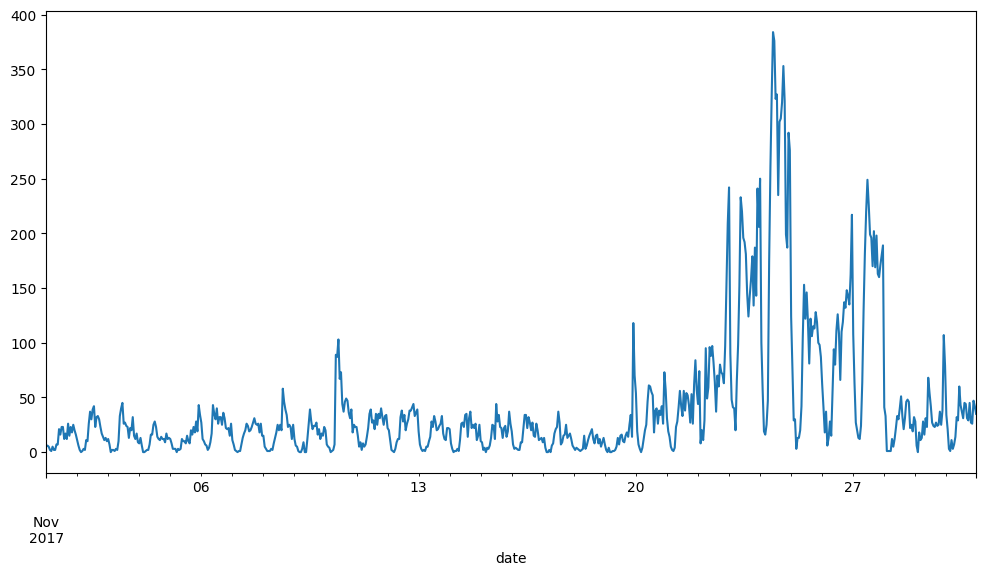

In [38]:
#Monika
ol_df["date"] = pd.to_datetime(ol_df["date"])
nov2017_df = ol_df.loc[(ol_df['date'].dt.year == 2017) & (ol_df['date'].dt.month == 11)]

(
    nov2017_df
    .resample("h", on="date")
    .count()["id_order"]
    .plot(figsize=(12,6))
 );

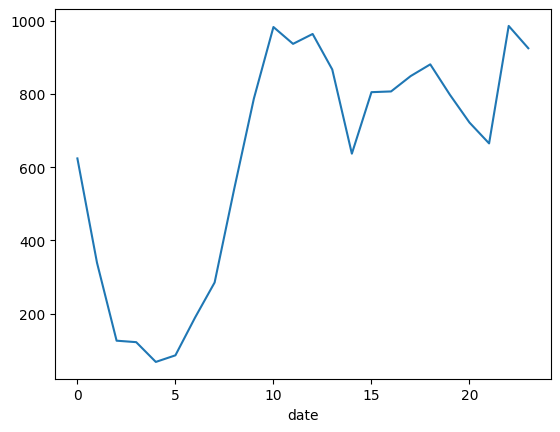

In [44]:
#Nora
november_df = (ol_df.loc[(ol_df["id_order"] & ol_df["date"].dt.year.eq(2017) & ol_df["date"].dt.month.eq(11))]
                .groupby(ol_df["date"].dt.hour).size().plot(kind = "line")
)

In [41]:
nov2017_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,day_of_week,brand_name,brand
121228,1394791,420581,0,1,APP2504,391.02,2017-11-01 00:19:03,Wednesday,APP,APP
121229,1394796,420583,0,1,OWC0194-4,374.99,2017-11-01 00:44:48,Wednesday,OWC,OWC
121230,1394801,420586,0,1,PAC2194,255.59,2017-11-01 00:57:03,Wednesday,PAC,PAC
121231,1394802,420586,0,1,APP1215,105.00,2017-11-01 00:57:03,Wednesday,APP,APP
121232,1394803,420586,0,1,APP1214,78.00,2017-11-01 00:57:03,Wednesday,APP,APP
...,...,...,...,...,...,...,...,...,...,...
151124,1470650,452966,0,1,BEL0275,14.99,2017-11-30 23:48:45,Thursday,BEL,BEL
151125,1470653,452967,0,1,WAC0225,444.99,2017-11-30 23:49:35,Thursday,WAC,WAC
151126,1470655,452966,0,1,ZAG0034,9.99,2017-11-30 23:52:18,Thursday,ZAG,ZAG
151127,1470656,452961,0,1,OTT0175,19.99,2017-11-30 23:53:26,Thursday,OTT,OTT


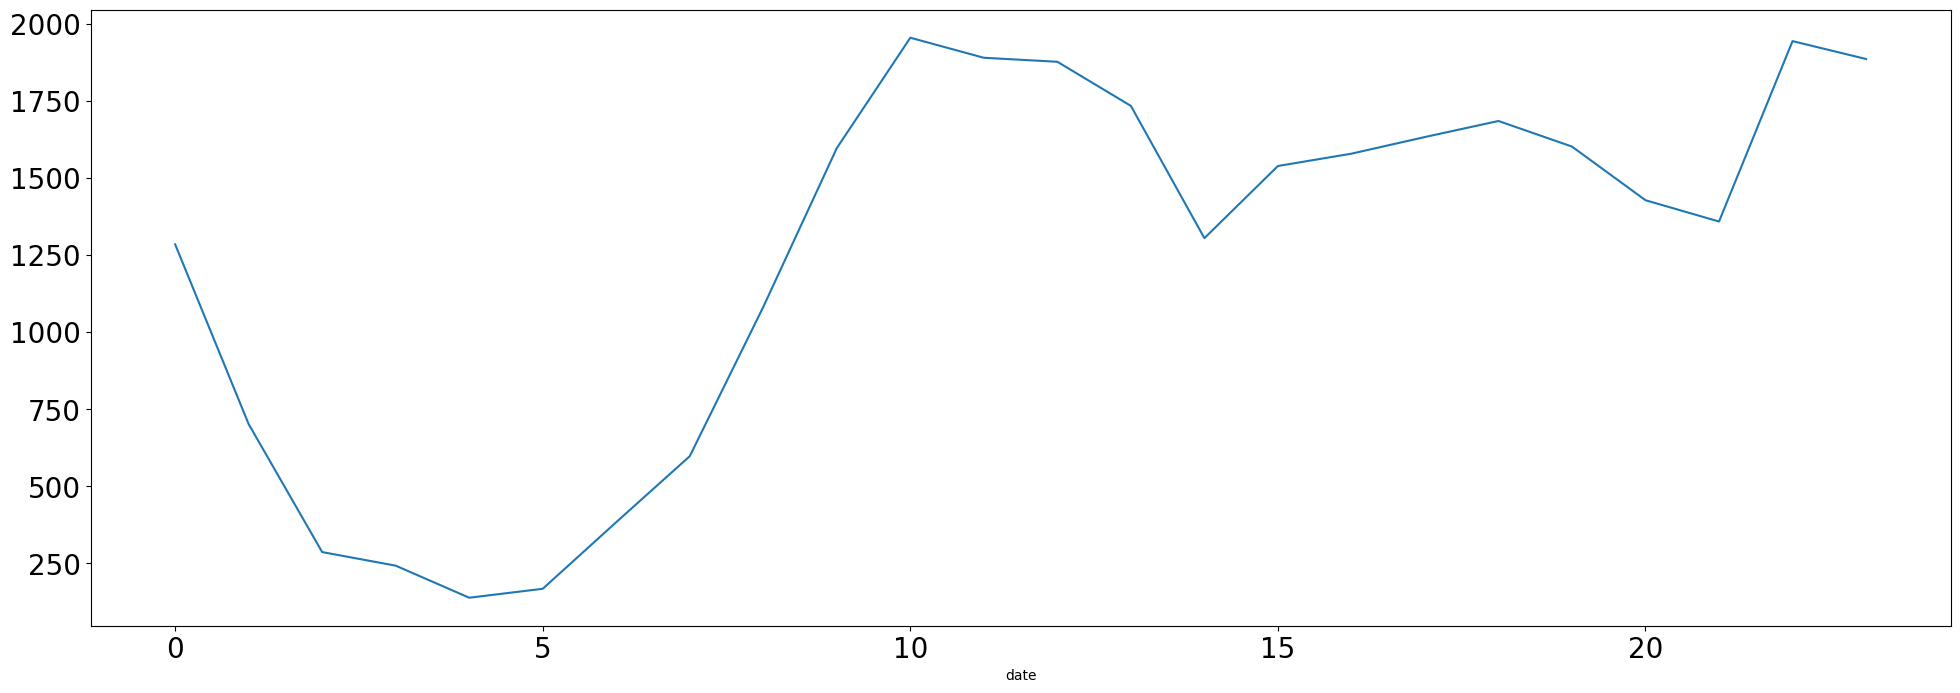

In [43]:
(
    nov2017_df
    .groupby(nov2017_df["date"].dt.hour)["id_order"]
    .count()
    .plot(figsize=(24, 8), fontsize=20)
);